In [25]:
#Import all necessary libraries for analysis

import pandas as pd
import panel as pn
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
import sys 
from pathlib import Path
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
import requests

import warnings
warnings.filterwarnings('ignore')

AttributeError: module 'pandas' has no attribute 'Panel'

In [2]:
#read in Air Passenger CSV file - this file contains monthly air traffic data in and out of the United States

airpassengers_Path = Path("C:/Users/srava/OneDrive/Documents/Rutgers FinTech Bootcamp/Project 1/US Monthly Air Passengers.csv") 
airpass_df = pd.read_csv(airpassengers_Path, index_col='DEST_COUNTRY_NAME')
airpass_df.head()

,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,YEAR,MONTH
DEST_COUNTRY_NAME,,,,,,,,,,,,,,,,
United States,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,AEX,"Alexandria, LA",LA,Louisiana,US,2015,3
United States,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,AFW,"Dallas/Fort Worth, TX",TX,Texas,US,2015,4
United States,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,ATL,"Atlanta, GA",GA,Georgia,US,2015,3
Colombia,89,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,BOG,"Bogota, Colombia",NaN,NaN,CO,2015,1
Colombia,108,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,BOG,"Bogota, Colombia",NaN,NaN,CO,2015,3


In [3]:
#renamed index column to 'Country name'
airpass_df = airpass_df.rename_axis('Country name')
airpass_df.head()

,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,YEAR,MONTH
Country name,,,,,,,,,,,,,,,,
United States,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,AEX,"Alexandria, LA",LA,Louisiana,US,2015,3
United States,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,AFW,"Dallas/Fort Worth, TX",TX,Texas,US,2015,4
United States,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,ATL,"Atlanta, GA",GA,Georgia,US,2015,3
Colombia,89,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,BOG,"Bogota, Colombia",NaN,NaN,CO,2015,1
Colombia,108,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,BOG,"Bogota, Colombia",NaN,NaN,CO,2015,3


In [4]:
#Drop columns that were not needed for the analysis
airpass_df_dropped = airpass_df.drop(columns =['Sum_PASSENGERS', 'AIRLINE_ID','CARRIER_NAME', 'ORIGIN','ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
                                    'ORIGIN_STATE_NM', 'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
                                    'DEST_STATE_NM','DEST_COUNTRY','MONTH'])
#Code to confirm that the columns were dropped
#airpass_df_dropped.count()
airpass_df_dropped

airpass_df_dropped['Unique Count'] = 0

#airpass_df_dropped
#We used the multigroup by to have the unique counts that describes how many times each country was travelled to per yearS
airpass_df_grp = airpass_df_dropped.groupby(['Country name','YEAR'])['Unique Count'].count()


airpass_df_grp
#type(airpass_df_grp)


#We reset the index so we can analyze the data and join with a data set we will be analyzing later
airpass_updated = pd.DataFrame(airpass_df_grp).reset_index()
airpass_updated


,Country name,YEAR,Unique Count
0,Aruba,2000,1
1,Aruba,2014,12
2,Aruba,2015,14
3,Aruba,2016,12
4,Aruba,2017,12
...,...,...,...
310,United States,2017,9390
311,United States,2018,10086
312,United States,2019,9676
313,United States,2020,5271


In [5]:
#df_copy = airpass_df_grp.copy()

#df_copy_df = pd.DataFrame({"Country name": sf.index, })

#df_copy.columns = ['Country name', 'YEAR', 'Count']
#print(df_copy)
#type(df_copy)

#df_copy['Unique Count'] = 0


#df_copy

airpass_updated.hvplot.bar(x='YEAR',
                          y='Unique Count',
                          groupby='Country name'
                          )

:DynamicMap   [Country name]
   :Bars   [YEAR]   (Unique Count)

In [6]:
#read in the historical world happiness excel file

hist_world_happiness_Path = Path("C:/Users/srava/OneDrive/Documents/Rutgers FinTech Bootcamp/Project 1/Historical World Happiness Data.xls")
hist_happiness_df = pd.read_excel(hist_world_happiness_Path, index_col='Country name')
hist_happiness_df.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
Denmark,2005,8.018934,10.851397,0.972372,69.599998,0.971135,NaN,0.236522,0.859549,0.153672
Denmark,2008,7.970892,10.880102,0.953912,70.080002,0.969788,0.272087,0.247505,0.756866,0.163091
Finland,2020,7.889350,10.750446,0.961621,72.099998,0.962424,-0.115532,0.163636,0.744292,0.192898
Finland,2018,7.858107,10.782932,0.962155,71.900002,0.937807,-0.127380,0.198605,0.781546,0.181781
Denmark,2007,7.834233,10.891111,0.954201,69.919998,0.932086,0.240024,0.206006,0.827860,0.194324


In [7]:
hist_happiness_df_drp = hist_happiness_df.drop(columns =['Log GDP per capita', 'Social support','Healthy life expectancy at birth',
                                                        'Freedom to make life choices', 'Generosity','Perceptions of corruption',
                                                        'Positive affect', 'Negative affect' ])
hist_happiness_df_drp.head()

,year,Life Ladder
Country name,,
Denmark,2005,8.018934
Denmark,2008,7.970892
Finland,2020,7.889350
Finland,2018,7.858107
Denmark,2007,7.834233


In [8]:
cons_hist_happiness=hist_happiness_df_drp.reset_index()
cons_hist_happiness

,Country name,year,Life Ladder
0,Denmark,2005,8.018934
1,Denmark,2008,7.970892
2,Finland,2020,7.889350
3,Finland,2018,7.858107
4,Denmark,2007,7.834233
...,...,...,...
1944,Zimbabwe,2019,2.693523
1945,Central African Republic,2016,2.693061
1946,Syria,2013,2.687553
1947,Afghanistan,2017,2.661718


In [9]:
cons_hist_happiness.hvplot.bar(x="Country name",
                          y="Life Ladder",
                          groupby="year")

:DynamicMap   [year]
   :Bars   [Country name]   (Life Ladder)

In [10]:
#read in the World Happiness 2021 dataset
curr_world_happiness_path = Path("C:/Users/srava/OneDrive/Documents/Rutgers FinTech Bootcamp/Project 1/world-happiness-report-2021.csv")
curr_happiness_df = pd.read_csv(curr_world_happiness_path, index_col = 'Country name')
curr_happiness_df.head()

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [11]:
#Add 2021 identification value for the 2021 data

curr_happiness_df['year'] = '2021'
#curr_happiness_df


In [12]:
curr_happiness_df_drp = curr_happiness_df.drop(columns =['Regional indicator','Standard error of ladder score','upperwhisker',
                                                        'lowerwhisker','Logged GDP per capita', 'Social support', 'Freedom to make life choices',
                                                        'Generosity','Perceptions of corruption', 'Ladder score in Dystopia','Explained by: Log GDP per capita',
                                                        'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices',
                                                        'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual','Healthy life expectancy'
                                                         ])

curr_happiness_df_drp = curr_happiness_df.rename(columns = {"Ladder score":"Life Ladder"})

curr_happiness_df_drp.head()

,Regional indicator,Life Ladder,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,year
Country name,,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,2021
Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,2021
Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,2021
Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,2021
Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,2021


In [13]:
cons_happiness_df = pd.concat([hist_happiness_df_drp,curr_happiness_df_drp], axis = 'rows', join = 'inner')
cons_happiness_df

cons_happiness_df_chart = cons_happiness_df.reset_index()
cons_happiness_df_chart

,Country name,year,Life Ladder
0,Denmark,2005,8.018934
1,Denmark,2008,7.970892
2,Finland,2020,7.889350
3,Finland,2018,7.858107
4,Denmark,2007,7.834233
...,...,...,...
2093,Lesotho,2021,3.512000
2094,Botswana,2021,3.467000
2095,Rwanda,2021,3.415000
2096,Zimbabwe,2021,3.145000


In [49]:
#Viewing happiness ranking per year

cons_happiness_df_chart.hvplot.table(columns=['Country name', 'year', 'Life Ladder'], width=400, groupby='year')

:DynamicMap   [year]
   :Table   [Country name,year,Life Ladder]

In [15]:
#Merged the two data frames to run analysis

combined_df = pd.merge(cons_happiness_df,
                       airpass_df_grp,
                       how='left',
                        left_on=[cons_happiness_df.index,'year'],
                       right_on=['Country name', 'YEAR']
                      )


#new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])

combined_df

,Country name,year,Life Ladder,Unique Count
0,Denmark,2005,8.018934,1.0
1,Denmark,2008,7.970892,NaN
2,Finland,2020,7.889350,NaN
3,Finland,2018,7.858107,NaN
4,Denmark,2007,7.834233,NaN
...,...,...,...,...
2093,Lesotho,2021,3.512000,NaN
2094,Botswana,2021,3.467000,NaN
2095,Rwanda,2021,3.415000,NaN
2096,Zimbabwe,2021,3.145000,NaN


In [16]:
combined_df.hvplot.table(columns=['Country name', 'Life Ladder', 'Unique Count'], width=400, groupby='year')

,Country name,year,Life Ladder,Unique Count
0,Denmark,2005,8.018934,1.0
20,Netherlands,2008,7.631012,98.0
32,Ireland,2008,7.568030,6.0
43,United States,2007,7.512688,16775.0
55,Canada,2009,7.487824,210.0
...,...,...,...,...
1512,China,2006,4.560495,72.0
1529,India,2009,4.521518,9.0
1564,China,2009,4.454361,70.0
1874,Madagascar,2015,3.592514,1.0


In [17]:
combined_df.to_csv('combined_df.csv')

In [26]:
#load dot_enc
load_dotenv()
#loading alpaca api key/secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [27]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [28]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [29]:
# Format current date as ISO format
today = pd.Timestamp("2021-07-15", tz="America/New_York").isoformat()


In [30]:
# Set the tickers
tickers = ["AAL", "UAL", "DAL", "RCL", "CCL", "IHG", "MAR", "WH", "WYNN", "YUM", "MCD", "DRI","BKNG", "EXPE"]
#tickers = ['IHG']

In [31]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [32]:
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2019-07-15", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-07-15", tz="America/New_York").isoformat()

In [33]:
# Get current prices for Tickers
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

# Display sample data
df_portfolio

AAL                                      BKNG  \
                            open     high    low  close    volume     open   
time                                                                         
2019-07-15 00:00:00-04:00  33.67  33.9500  33.42  33.61   3024568  1881.89   
2019-07-16 00:00:00-04:00  33.70  34.6700  33.70  34.21   5870319  1879.89   
2019-07-17 00:00:00-04:00  34.34  34.4199  33.11  33.25   5452541  1887.75   
2019-07-18 00:00:00-04:00  33.41  33.8200  33.11  33.75   2594330  1861.83   
2019-07-19 00:00:00-04:00  33.82  34.0200  33.06  33.07   3913009  1896.03   
...                          ...      ...    ...    ...       ...      ...   
2021-07-09 00:00:00-04:00  20.79  21.0000  20.50  20.88  20301340  2182.08   
2021-07-12 00:00:00-04:00  20.73  20.9800  20.35  20.85  19443662  2182.06   
2021-07-13 00:00:00-04:00  20.74  20.7000  19.99  20.01  27563886  2204.40   
2021-07-14 00:00:00-04:00  20.88  21.5700  20.43  20.62  51025349  2206.02   
2021-07-15 00:00:00-04:00  20.56  21.0590  20.15  20.46  32684463  2173.00   

                                                               ...      WYNN  \
                              high       low    close  volume  ...      open   
time                                                           ...             
2019-07-15 00:00:00-04:00  1885.24  1872.290  1881.91  250052  ...  133.9300   
2019-07-16 00:00:00-04:00  1897.22  1875.570  1888.89  216107  ...  138.0000   
2019-07-17 00:00:00-04:00  1897.09  1866.530  1866.69  214952  ...  139.2500   
2019-07-18 00:00:00-04:00  1895.68  1861.830  1885.91  196706  ...  135.4400   
2019-07-19 00:00:00-04:00  1901.59  1882.840  1883.00  164141  ...  135.8900   
...                            ...       ...      ...     ...  ...       ...   
2021-07-09 00:00:00-04:00  2205.34  2160.445  2194.44  256517  ...  113.1989   
2021-07-12 00:00:00-04:00  2206.18  2166.500  2204.08  207439  ...  112.8700   
2021-07-13 00:00:00-04:00  2228.74  2185.810  2191.39  291733  ...  112.9300   
2021-07-14 00:00:00-04:00  2218.10  2175.890  2179.82  160705  ...  112.2000   
2021-07-15 00:00:00-04:00  2183.31  2145.500  2170.41  222206  ...  109.9000   

                                                                YUM          \
                             high      low   close   volume    open    high   
time                                                                          
2019-07-15 00:00:00-04:00  137.99  133.420  137.79  2388872  111.29  112.13   
2019-07-16 00:00:00-04:00  141.26  136.850  139.34  2123795  111.81  112.15   
2019-07-17 00:00:00-04:00  139.33  135.450  135.90  1167572  111.53  112.10   
2019-07-18 00:00:00-04:00  135.73  134.370  135.09   748169  112.23  113.37   
2019-07-19 00:00:00-04:00  137.01  134.565  134.66   798910  113.46  113.59   
...                           ...      ...     ...      ...     ...     ...   
2021-07-09 00:00:00-04:00  114.94  112.340  113.86  2967611  118.36  118.85   
2021-07-12 00:00:00-04:00  114.10  111.710  114.00  1603254  118.03  118.26   
2021-07-13 00:00:00-04:00  113.30  111.380  111.53  1748400  117.68  117.72   
2021-07-14 00:00:00-04:00  113.32  109.800  110.70  1826333  117.21  118.04   
2021-07-15 00:00:00-04:00  110.66  106.750  108.20  2646857  116.81  117.21   

                                                   
                              low   close  volume  
time                                               
2019-07-15 00:00:00-04:00  111.21  111.92  774893  
2019-07-16 00:00:00-04:00  111.18  111.52  758445  
2019-07-17 00:00:00-04:00  111.37  111.77  724956  
2019-07-18 00:00:00-04:00  112.00  113.07  962982  
2019-07-19 00:00:00-04:00  112.48  112.54  966126  
...                           ...     ...     ...  
2021-07-09 00:00:00-04:00  117.88  118.56  828657  
2021-07-12 00:00:00-04:00  117.36  117.86  872340  
2021-07-13 00:00:00-04:00  116.89  117.09  997915  
2021-07-14 00:00:00-04:00  116.92  117.13  799400  
2021-07-15 00:00:00-04:00  116.0

In [34]:
df_closing_prices = pd.DataFrame()
df_closing_prices["AAL"] = df_portfolio["AAL"]["close"]
df_closing_prices["UAL"] = df_portfolio["UAL"]["close"]
df_closing_prices["DAL"] = df_portfolio["DAL"]["close"]
df_closing_prices["RCL"] = df_portfolio["RCL"]["close"]
df_closing_prices["CCL"] = df_portfolio["CCL"]["close"]
df_closing_prices["IHG"] = df_portfolio["IHG"]["close"]
df_closing_prices["MAR"] = df_portfolio["MAR"]["close"]
df_closing_prices["WH"] = df_portfolio["WH"]["close"]
df_closing_prices["WYNN"] = df_portfolio["WYNN"]["close"]
df_closing_prices["YUM"] = df_portfolio["YUM"]["close"]
df_closing_prices["MCD"] = df_portfolio["MCD"]["close"]
df_closing_prices["DRI"] = df_portfolio["DRI"]["close"]
df_closing_prices["BKNG"] = df_portfolio["BKNG"]["close"]
df_closing_prices["EXPE"] = df_portfolio["EXPE"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

df_closing_prices

,AAL,UAL,DAL,RCL,CCL,IHG,MAR,WH,WYNN,YUM,MCD,DRI,BKNG,EXPE
2019-07-15,33.61,91.31,61.68,112.840,46.95,69.61,142.750,60.73,137.79,111.92,214.18,125.43,1881.91,134.71
2019-07-16,34.21,94.01,63.17,114.560,46.45,69.91,143.960,61.19,139.34,111.52,213.70,123.21,1888.89,136.37
2019-07-17,33.25,94.75,62.23,111.700,45.64,69.70,141.240,59.60,135.90,111.77,213.73,122.21,1866.69,135.12
2019-07-18,33.75,95.25,62.66,111.000,45.49,69.78,139.800,59.97,135.09,113.07,215.89,124.06,1885.91,136.45
2019-07-19,33.07,93.82,60.91,110.170,45.09,69.56,137.700,58.79,134.66,112.54,213.91,124.39,1883.00,135.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-09,20.88,51.10,42.92,82.330,24.26,67.00,142.480,72.20,113.86,118.56,235.70,148.64,2194.44,167.75
2021-07-12,20.85,50.62,42.85,81.555,23.86,65.76,141.770,71.93,114.00,117.86,235.69,149.95,2204.08,167.37
2021-07-13,20.01,48.51,41.34,78.520,22.85,64.61,138.350,70.91,111.53,117.09,236.23,147.40,2191.39,162.03
2021-07-14,20.62,48.16,40.69,76.210,22.57,64.35,139.679,70.44,110.70,117.13,237.14,147.37,2179.82,161.05


In [35]:
#creating data frame for subsector airlines
df_airlines = pd.DataFrame()
df_airlines["AAL"] = df_closing_prices["AAL"]
df_airlines["UAL"] = df_closing_prices["UAL"]
df_airlines["DAL"] = df_closing_prices["DAL"]

#creating data frame for subsector cruiselines  
df_cruiselines = pd.DataFrame()
df_cruiselines["RCL"] = df_closing_prices["RCL"]
df_cruiselines["CCL"] = df_closing_prices["CCL"]

#creating data frame for subsector hotels
df_hotels = pd.DataFrame()
df_hotels["IHG"] = df_closing_prices["IHG"]
df_hotels["MAR"] = df_closing_prices["MAR"]
df_hotels["WH"] = df_closing_prices["WH"]
df_hotels["WYNN"] = df_closing_prices["WYNN"]

#creating data frame for subsector restaurants 
df_restaurants = pd.DataFrame()
df_restaurants["YUM"] = df_closing_prices["YUM"]
df_restaurants["MCD"] = df_closing_prices["MCD"]
df_restaurants["DRI"] = df_closing_prices["DRI"]


#creating data frame for subsector online travel services
df_online_travel_services = pd.DataFrame()
df_online_travel_services["BKNG"] = df_closing_prices["BKNG"]
df_online_travel_services["EXPE"] = df_closing_prices["EXPE"]

In [36]:
df_airlines.head()

,AAL,UAL,DAL
2019-07-15,33.61,91.31,61.68
2019-07-16,34.21,94.01,63.17
2019-07-17,33.25,94.75,62.23
2019-07-18,33.75,95.25,62.66
2019-07-19,33.07,93.82,60.91


In [76]:
#df_airlines.plot()

<Figure size 2160x1440 with 0 Axes>

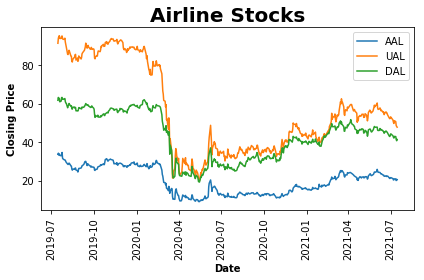

In [77]:
plt.figure(figsize=(30,20))
df_airlines.plot()
plt.xticks(fontsize=10, fontweight='normal',rotation=90)
plt.yticks(fontsize=10, fontweight='normal')
plt.xlabel('Date',fontsize=10, fontweight='bold')
plt.ylabel('Closing Price',fontsize=10, fontweight='bold')
plt.title('Airline Stocks',fontsize=20, fontweight='bold')
plt.tight_layout()

In [78]:
df_hotels.head()

,IHG,MAR,WH,WYNN
2019-07-15,69.61,142.75,60.73,137.79
2019-07-16,69.91,143.96,61.19,139.34
2019-07-17,69.70,141.24,59.60,135.90
2019-07-18,69.78,139.80,59.97,135.09
2019-07-19,69.56,137.70,58.79,134.66


In [79]:
#df_hotels.plot()

<Figure size 2160x1440 with 0 Axes>

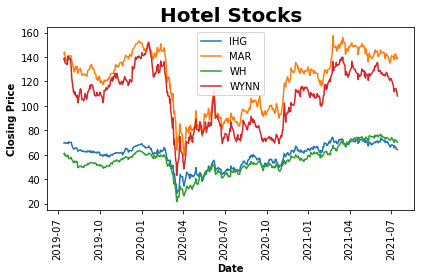

In [80]:
plt.figure(figsize=(30,20))
df_hotels.plot()
plt.xticks(fontsize=10, fontweight='normal',rotation=90)
plt.yticks(fontsize=10, fontweight='normal')
plt.xlabel('Date',fontsize=10, fontweight='bold')
plt.ylabel('Closing Price',fontsize=10, fontweight='bold')
plt.title('Hotel Stocks',fontsize=20, fontweight='bold')
plt.tight_layout()

In [81]:
df_restaurants.head()

,YUM,MCD,DRI
2019-07-15,111.92,214.18,125.43
2019-07-16,111.52,213.70,123.21
2019-07-17,111.77,213.73,122.21
2019-07-18,113.07,215.89,124.06
2019-07-19,112.54,213.91,124.39


In [82]:
#df_restaurants.plot()

<Figure size 2160x1440 with 0 Axes>

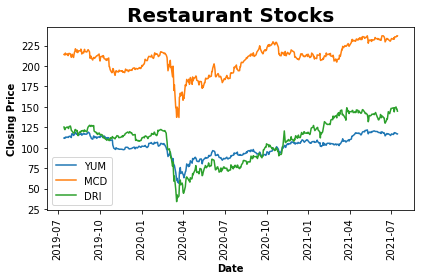

In [83]:
plt.figure(figsize=(30,20))
df_restaurants.plot()
plt.xticks(fontsize=10, fontweight='normal',rotation=90)
plt.yticks(fontsize=10, fontweight='normal')
plt.xlabel('Date',fontsize=10, fontweight='bold')
plt.ylabel('Closing Price',fontsize=10, fontweight='bold')
plt.title('Restaurant Stocks',fontsize=20, fontweight='bold')
plt.tight_layout()

In [84]:
df_online_travel_services.head()

,BKNG,EXPE
2019-07-15,1881.91,134.71
2019-07-16,1888.89,136.37
2019-07-17,1866.69,135.12
2019-07-18,1885.91,136.45
2019-07-19,1883.00,135.10


In [85]:
#df_online_travel_services.plot()

<Figure size 2160x1440 with 0 Axes>

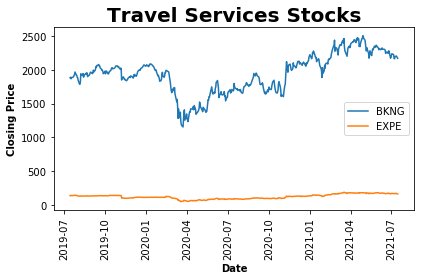

In [86]:
plt.figure(figsize=(30,20))
df_online_travel_services.plot()
plt.xticks(fontsize=10, fontweight='normal',rotation=90)
plt.yticks(fontsize=10, fontweight='normal')
plt.xlabel('Date',fontsize=10, fontweight='bold')
plt.ylabel('Closing Price',fontsize=10, fontweight='bold')
plt.title('Travel Services Stocks',fontsize=20, fontweight='bold')
plt.tight_layout()

In [87]:
df_cruiselines.head()

,RCL,CCL
2019-07-15,112.84,46.95
2019-07-16,114.56,46.45
2019-07-17,111.70,45.64
2019-07-18,111.00,45.49
2019-07-19,110.17,45.09


In [88]:
#df_cruiselines.plot()

<Figure size 2160x1440 with 0 Axes>

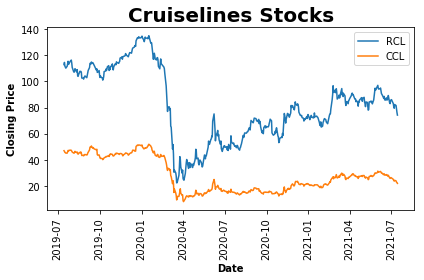

In [89]:
plt.figure(figsize=(30,20))
df_cruiselines.plot()
plt.xticks(fontsize=10, fontweight='normal',rotation=90)
plt.yticks(fontsize=10, fontweight='normal')
plt.xlabel('Date',fontsize=10, fontweight='bold')
plt.ylabel('Closing Price',fontsize=10, fontweight='bold')
plt.title('Cruiselines Stocks',fontsize=20, fontweight='bold')
plt.tight_layout()